# Fashion-MNIST Classification with CNN and Autoencoder Feature Extraction

This notebook covers:
- Training a CNN to classify Fashion-MNIST images
- Building an autoencoder to learn latent features
- Using the encoder output as features for a Logistic Regression classifier
- Saving and loading all models
- Making predictions using savedodels



# Import Required Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input , Flatten , Dense , Reshape
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.svm import SVC

# Load the Fashion MNIST Dataset 

In [118]:
(X_train, y_train),(X_test , y_test) = fashion_mnist.load_data()

# Data Preprocessing 

In [120]:
# Normalise the image :
X_train = X_train / 255.0
X_test = X_test / 255.0

# Visaulising the Dataset imgaes 

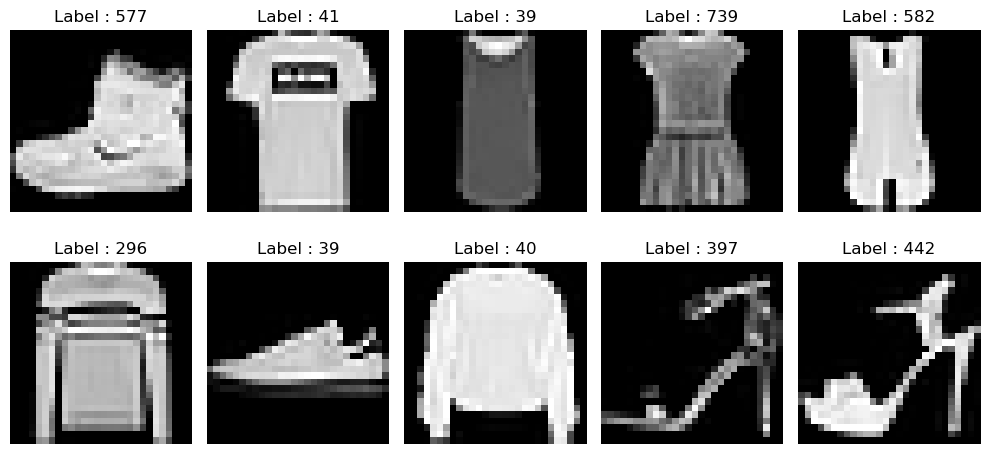

In [122]:
#visualize
plt.figure(figsize=(10,5)) #sizing the canvas
for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[i].reshape(28,28)
    plt.imshow(img, cmap='gray') #black and white
    plt.title(f"Label : {np.argmax(X_test[i])}")
    plt.axis('off')
plt.tight_layout()

In [124]:
# Reshape to add channel dimension (only for Gray scal image data)
X_train = X_train.reshape(-1,28,28,1) 
X_test = X_test.reshape(-1,28,28,1)

# Data Augmentation 

In [126]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Building the Model 

In [128]:

model = models.Sequential([
    # Conv 1
    layers.Conv2D(32,(3,3),strides=1,padding='same',activation='relu',input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    # Conv 2
    layers.Conv2D(64,(3,3),strides=1,padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    # Conv 3
    layers.Conv2D(128,(3,3),strides=1,padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    

    # Flatten + Dense :
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    # Output Layer :
    layers.Dense(10,activation='softmax') # 10 classes for items
])

C:\Users\aparn\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Compiling :

In [130]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

# Train the model 

In [132]:
history = model.fit (X_train,
                    y_train, 
                    epochs=20,
                    batch_size = 64,
                    validation_split=0.1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.8146 - loss: 0.5329 - val_accuracy: 0.8917 - val_loss: 0.2946
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.8987 - loss: 0.2747 - val_accuracy: 0.9095 - val_loss: 0.2505
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 70s 83ms/step - accuracy: 0.9172 - loss: 0.2262 - val_accuracy: 0.9095 - val_loss: 0.2562
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 69s 82ms/step - accuracy: 0.9245 - loss: 0.2054 - val_accuracy: 0.9122 - val_loss: 0.2363
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 71s 84ms/step - accuracy: 0.9362 - loss: 0.1776 - val_accuracy: 0.9157 - val_loss: 0.2288
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 74s 87ms/step - accuracy: 0.9416 - loss: 0.1586 - val_accuracy: 0.9227 - val_loss: 0.2194
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.9480 - loss: 0.1408 - val_accuracy: 0.9180 - val_loss: 0.2258
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.9555 - loss: 0.1210 - 

# Evaluation :

In [135]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy : {test_accuracy : .4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9195 - loss: 0.3537
Test Accuracy :  0.9196


# Visualization of Accuracy And Loss 

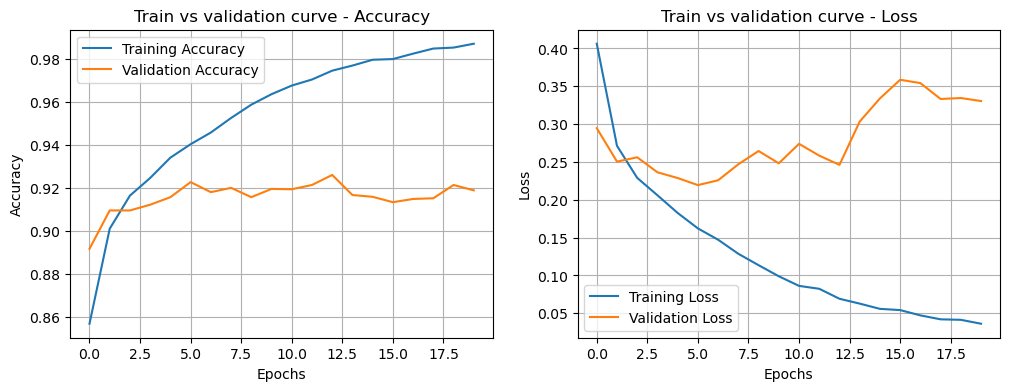

In [137]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Train vs validation curve - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Train vs validation curve - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Save the Model 

In [139]:
model.save("fashion_mnist_cnn.h5")

# Load the Trained CNN Model

In [141]:
# load the trained CNN model
model = tf.keras.models.load_model("fashion_mnist_cnn.h5")

# Making Prediction Using Trained Model

In [143]:
#Predict on one sample
pred = model.predict(np.expand_dims(X_test[10], axis=0))  # Add batch dimension
# Get predicted class:
predicted_class = np.argmax(pred)
# Result:
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
Predicted class: 4


# Visualize the Prediction

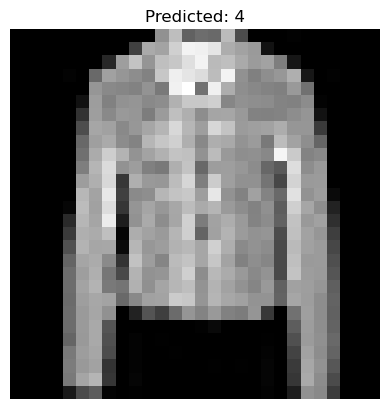

In [145]:
plt.imshow(X_test[10].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

# Build Autoencoder 

In [50]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()  
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

In [52]:
X_train = X_train.reshape((len(X_train), 28 * 28))
X_test = X_test.reshape((len(X_test), 28 * 28))

In [54]:
# Input
input_img = Input(shape=(784,))

# Encoded
encoded = Dense(128,activation='relu')(input_img)
encoded = Dense(64,activation='relu')(input_img)
bottle_neck = Dense(64,activation='relu')(encoded)

# Decoded
decoded = Dense(128,activation='relu')(encoded)
decoded = Dense(64,activation='relu')(decoded)
output_img = Dense(784,activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = Model(input_img,output_img)
autoencoder.compile(
    optimizer = 'adam',
    loss = 'mse'
    )

In [56]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,776 (460.06 KB)

 Trainable params: 117,776 (460.06 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model 

In [58]:
history = autoencoder.fit(X_train,
                X_train,
                epochs = 50,
                batch_size = 256,
                shuffle = True,
                validation_data = (X_test , X_test)
               )

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0803 - val_loss: 0.0258
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0242 - val_loss: 0.0207
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - val_loss: 0.0186
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181 - val_loss: 0.0170
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167 - val_loss: 0.0160
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0150
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0143
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140 - val_loss: 0.0138
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0135 - val_loss: 0.0133
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0132 - val_loss: 0.0134
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0128 - val_loss: 0.0126
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [62]:
# Extracting the features by bottleneck i.e latent features.
encoder = Model(input_img, bottle_neck)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [162]:
X_test.shape

(10000, 28, 28, 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


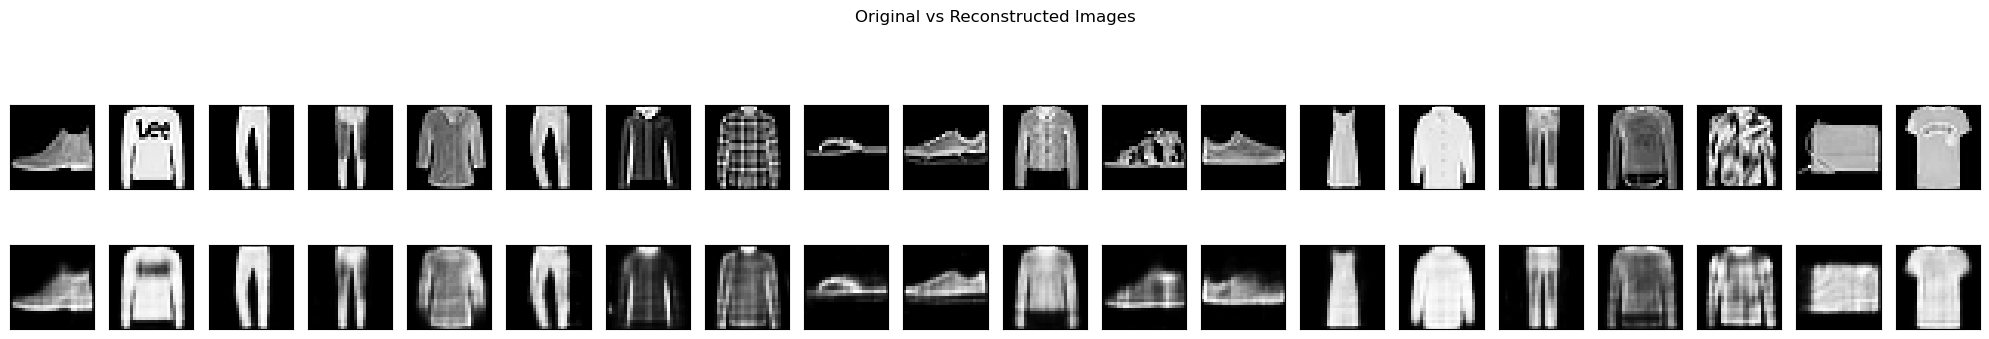

In [160]:
# Need to reshape
X_test_flat = X_test.reshape(-1, 784)
X_test_decoded = autoencoder.predict(X_test_flat)

# Plotting the Images 
n = 20
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_decoded[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.suptitle("Original vs Reconstructed Images")
plt.tight_layout()
plt.show()


# Training using Logistics Regression Classifier

In [73]:
lor = LogisticRegression(max_iter = 1000)
lor.fit(X_train_encoded , y_train)

C:\Users\aparn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [95]:
# Prediction
y_pred = lor.predict(X_test_encoded)

# Results 
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification report: \n ", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix : \n \n ", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.8065
Logistic Regression Classification report: 
                precision    recall  f1-score   support

           0       0.75      0.80      0.78      1000
           1       0.98      0.95      0.96      1000
           2       0.70      0.67      0.68      1000
           3       0.79      0.85      0.82      1000
           4       0.67      0.70      0.68      1000
           5       0.89      0.88      0.89      1000
           6       0.55      0.49      0.52      1000
           7       0.87      0.89      0.88      1000
           8       0.92      0.92      0.92      1000
           9       0.91      0.92      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.81     10000
weighted avg       0.80      0.81      0.81     10000

Logistic Regression Confusion Matrix : 
 
  [[801   3  17  70   8   2  83   0  16   0]
 [  3 948   9  30   5   0   5   0   0   0]
 [ 21   1 667  20 161   0 11

# Training using SVC Classifier

In [100]:
# Intializing the Classifier
svm = SVC()

# Training 
svm.fit(X_train_encoded, y_train)

# Prediction
y_pred_svm = svm.predict(X_test_encoded)

# Results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification report: \n ", classification_report(y_test, y_pred_svm))
print("Logistic Regression Confusion Matrix : \n \n ", confusion_matrix(y_test, y_pred_svm))

Logistic Regression Accuracy: 0.8065
Logistic Regression Classification report: 
                precision    recall  f1-score   support

           0       0.76      0.81      0.78      1000
           1       0.99      0.94      0.96      1000
           2       0.73      0.71      0.72      1000
           3       0.79      0.87      0.83      1000
           4       0.72      0.74      0.73      1000
           5       0.92      0.91      0.92      1000
           6       0.60      0.53      0.56      1000
           7       0.90      0.91      0.91      1000
           8       0.94      0.95      0.95      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Logistic Regression Confusion Matrix : 
 
  [[813   1  14  71   7   1  75   0  18   0]
 [  2 939   8  40   6   0   4   0   1   0]
 [ 14   1 709  21 146   0 10

# Saving the Required Models 

In [104]:
# Saving the full autoencoder model ((architecture + weights + optimizer state)
autoencoder.save('fashion_mnist_autoencoder.h5')

In [106]:
# Saving the encoder model to extraxt the latent feature separately.
encoder.save('fashion_mnist_enoder.h5')

In [116]:
# Saving the both Classifier models

# Logistics Regression
with open('fashion_mnist_Log-Regression.pkl', 'wb') as f:
    pickle.dump(lor,f)

# SVM
with open('fashion_mnist_SVM.pkl', 'wb') as f:
    pickle.dump(svm,f)

# Load the Model

In [147]:
# Logistics Regression
with open('fashion_mnist_Log-Regression.pkl', 'rb') as f:
    model = pickle.load(f)

# SVM
with open('fashion_mnist_SVM.pkl', 'rb') as f:
    model = pickle.load(f)

## Summary

- Trained CNN and Autoencoder on Fashion-MNIST
- Used encoder output for logistic regression
- Saved and loaded all models
- Visualized original vs reconstructed images
- Predicted classes using CNN .
